# 2. Clasificación con el Algoritmo del Perceptrón

Implementaremos una versión básica del algoritmo del perceptrón para clasificación binaria.

En este caso los datos de entrada serán de **dos dimensiones**.

In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
import numpy as np
np.set_printoptions(suppress=True)  # no usar notacion "e"

## Datos

Usaremos scikit-learn ([make_classification](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html)) para generar datos aleatorios de dos dimensiones, divididos en dos clases etiquetadas con los valores 1 y -1.

Los datos serán linealmente separables. Fijamos la semilla aleatoria para obtener siempre los mismos resultados.

In [10]:
from sklearn.datasets import make_classification

size = 100
X, y_true = make_classification(n_samples=size, n_features=2, n_classes=2,
                                   n_redundant=0, n_informative=2,
                                   n_clusters_per_class=1, class_sep=0.5,
                                   random_state=1)
y_true[y_true == 0] = -1

In [11]:
y_true

array([ 1, -1, -1,  1,  1,  1, -1,  1, -1,  1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1, -1,  1, -1, -1,  1, -1, -1, -1,  1,  1,  1,  1, -1,
       -1,  1, -1, -1, -1, -1,  1,  1, -1, -1,  1, -1,  1,  1, -1,  1,  1,
       -1,  1,  1,  1, -1, -1, -1,  1,  1, -1, -1,  1, -1, -1,  1, -1, -1,
       -1,  1, -1, -1, -1,  1,  1,  1, -1,  1,  1,  1, -1, -1, -1,  1,  1,
        1, -1,  1,  1,  1, -1,  1, -1, -1,  1, -1,  1,  1, -1,  1])

Graficamos para ver el resultado. Acá, los azules son 1, los rojos -1.

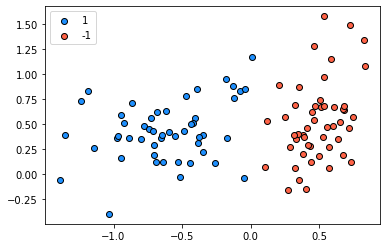

In [12]:
plt.scatter(X[y_true==1, 0], X[y_true==1, 1], color="dodgerblue", edgecolors='k', label="1")
plt.scatter(X[y_true==-1, 0], X[y_true==-1, 1], color="tomato", edgecolors='k', label="-1")
plt.legend()
plt.show()

### División en Entrenamiento y Evaluación

In [13]:
train_size = 60
test_size = size - train_size
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y_true[:train_size], y_true[train_size:]

In [14]:
X_train.shape, X_test.shape

((60, 2), (40, 2))

## Algoritmo del Perceptrón

### Inicialización

Comenzamos a partir de un vector cualquiera:

In [15]:
w = np.ones(2)

In [16]:
w

array([1., 1.])

### Predicción

Definimos la función de predicción:

In [17]:
def predict(X, w):
    return np.sign(np.dot(X, w))

Probamos predecir con el primer modelo:

In [18]:
y_pred = predict(X_test, w)
y_pred

array([ 1.,  1., -1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
       -1., -1., -1.,  1.,  1., -1., -1.,  1.,  1.,  1., -1., -1., -1.,
        1.,  1., -1., -1.,  1., -1.,  1.,  1., -1.,  1., -1., -1.,  1.,
        1.])

In [19]:
y_test

array([-1, -1,  1, -1, -1,  1, -1, -1, -1,  1, -1, -1, -1,  1,  1,  1, -1,
        1,  1,  1, -1, -1, -1,  1,  1,  1, -1,  1,  1,  1, -1,  1, -1, -1,
        1, -1,  1,  1, -1,  1])

### Evaluación

Calcularemos la "accuracy" sobre los datos de evaluación.

In [20]:
def accuracy(y_true, y_pred):
    return (y_true == y_pred).sum() / y_true.shape[0]

In [21]:
accuracy(y_test, y_pred)

0.1

En este caso el resultado es muy bajo.

Graficamos la frontera de decisión:

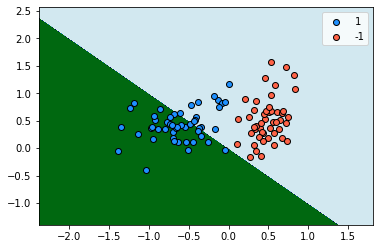

In [25]:
from utils import plot_decision_boundary

plot_decision_boundary(lambda x: predict(x, w), X, y_true)


### Un Paso del Algoritmo

Primero debemos buscar un elemento de entrenamiento mal clasificado:

In [ ]:
y_pred = predict(X_train, w)

In [ ]:
np.where((y_train == y_pred) == False)

In [ ]:
y_train[0], y_pred[0]

Tomamos el primero:

In [ ]:
i = 0
xi, yi = X_train[i], y_train[i]

In [ ]:
xi.shape  # qué da?

Verificamos que la clasificación es incorrecta:

In [ ]:
yi_pred = predict(xi, w)
yi, yi_pred

Probemos graficar el punto:

In [ ]:
y2 = np.ones(size)
y2[i] = -1
plot_decision_boundary(lambda x: predict(x, w), X, y2)

Ahora actualicemos el modelo y veamos si se corrige la clasificación:

In [ ]:
r = 1.0  # learning rate
new_w = w + r * xi * yi
predict(xi, new_w)

Probemos otras tasas de aprendizaje, a ver qué pasa:

In [ ]:
for r in [0.001, 0.01, 0.1, 0.5, 1.0]:
    new_w = w + r * xi * yi
    print(r, predict(xi, new_w))

Lo dejamos en $r=1$. Evaluemos el nuevo modelo, para ver si mejora el resultado:

In [ ]:
y_pred = predict(X_test, new_w)
accuracy(y_test, y_pred)

In [ ]:
plot_decision_boundary(lambda x: predict(x, new_w), X, y_true)

In [ ]:
new_w

## Perceptrón: Algoritmo completo

Implementaremos el algoritmo completo, iterando hasta que todos los datos de entrenamiento estén clasificados correctamente:

In [ ]:
w = np.ones(2)

r = 0.5  # qué pasaría
step = 0
finished = False
while not finished:
    # 1. predecir usando el modelo actual
    y_pred = predict(X_train, w)
    y_test_pred = predict(X_test, w)
    
    # 2. evaluar
    train_acc = accuracy(y_train, y_pred)
    test_acc = accuracy(y_test, y_test_pred)
    print(f'step={step}\ttrain_acc={train_acc:0.2}\ttest_acc={test_acc:0.2}')

    # 3. si no clasifica todo bien, actualizar modelo
    if (y_train == y_pred).all():
        finished = True
    else:
        indices = np.where((y_train == y_pred) == False)
        i = indices[0][0]
        xi, yi = X_train[i], y_train[i]
        w = w + r * xi * yi
        
        step = step + 1

Grafiquemos el resultado final:

In [ ]:
plot_decision_boundary(lambda x: predict(x, w), X, y_true)

## Ejercicios

1. Experimentar con otras tasas de aprendizaje.
2. Generar datos no linealmente separables (probar achicando el valor de 'class_sep' en 'make_classification').
3. Adaptar el algoritmo del perceptrón para que funcione con estos datos (ver variante "pocket" en [Wikipedia](https://en.wikipedia.org/wiki/Perceptron)).
4. Hacer todo con el perceptrón de Scikit-learn ([Perceptron](https://scikit-learn.org/stable/modules/linear_model.html#perceptron)).

## Referencias

- [Perceptron (Wikipedia)](https://en.wikipedia.org/wiki/Perceptron)
- [Perceptron Learning Algorithm: A Graphical Explanation Of Why It Works](https://towardsdatascience.com/perceptron-learning-algorithm-d5db0deab975)
- Gallant, S. I. (1990). [Perceptron-based learning algorithms.](https://ftp.cs.nyu.edu/~roweis/csc2515-2006/readings/gallant.pdf) IEEE Transactions on Neural Networks, vol. 1, no. 2, pp. 179–191. 

Scikit-learn:

- [make_classification](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html)
- [Perceptron](https://scikit-learn.org/stable/modules/linear_model.html#perceptron)
